### **UNSUPERVISED LEARNING PROJECT - Customer Segmentation with Clustering**

**Learning Objectives**

- How to load and inspect any dataset
- Key questions to ask about your data
- Initial data quality checks

#### **1. Data ingestion**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import zipfile

# import stansdard scaler
from sklearn.preprocessing import StandardScaler

# import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
# Download from: https://archive.ics.uci.edu/ml/datasets/online+retail
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'


In [ ]:

try:
    df = pd.read_excel(url)
    print("✓ Data loaded successfully!")
except:
    print("Note: If download fails, you can manually download from:")
    print("https://archive.ics.uci.edu/ml/datasets/online+retail")
    print("Then load with: df = pd.read_excel('Online Retail.xlsx')")


In [5]:
# df.head(2)

In [6]:
# df.to_csv('Online_Retail.csv', index=False)
df = pd.read_csv('Online_Retail.csv')

In [7]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### **2. Preliminary Data Analysis**

In [8]:
# Lets check our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Lets take a snap shot of our data
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Rows: 541,909
Columns: 8


In [10]:
# Lets check our datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
# Lets check for missing values

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

,Missing Count,Percentage
CustomerID,135080,24.926694
Description,1454,0.268311
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [12]:
# Drop missing CustomerIDs
df = df.dropna(subset=['CustomerID'])

In [13]:
# Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [14]:
df.InvoiceNo.unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      shape=(18536,), dtype=object)

In [15]:
# lets drop missing values

df.dropna(inplace=True)

In [16]:
# Lets check for missing values again

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

,Missing Count,Percentage
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


In [17]:
# Lets check for duplicate values or rows

df.duplicated().sum(
    axis=0
)

np.int64(5192)

In [18]:
# lets remove duplicate

df.drop_duplicates(inplace=True)

In [19]:
# Lets check for duplicate values or rows again

df.duplicated().sum(
    axis=0
)

np.int64(0)

In [20]:
df.shape

(392732, 8)

### **3. Exploratory Data Analysis**

In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##### **a. Univariate analysis**

In [22]:
# Here, we will inspect our variables one by one

In [23]:
# InvoiceNo
print(f"Number of unique InvoiceNo: {df.InvoiceNo.nunique()}")
print(f"Number of transactions: {len(df.InvoiceNo)}")
print(f"List of unique InvoiceNo:{df.InvoiceNo.unique()}")
print(f"Data types: {df.InvoiceNo.dtypes}")

Number of unique InvoiceNo: 18536
Number of transactions: 392732
List of unique InvoiceNo:['536365' '536366' '536367' ... '581585' '581586' '581587']
Data types: object


In [24]:
# StockCode
print(f"Number of unique StockCode: {df.StockCode.nunique()}")
print(f"Number of transactions: {len(df.StockCode)}")
print(f"List of unique StockCode:{df.StockCode.unique()}")
print(f"Data types: {df.StockCode.dtypes}")

Number of unique StockCode: 3665
Number of transactions: 392732
List of unique StockCode:['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
Data types: object


In [25]:
# Description
print(f"Number of unique product Description: {df.Description.nunique()}")
print(f"Number of Description: {len(df.Description)}")
print(f"List of Description:{df.Description.value_counts().head(10)}")
print(f"Data types: {df.Description.dtypes}")

Number of unique product Description: 3877
Number of Description: 392732
List of Description:Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: count, dtype: int64
Data types: object


In [26]:
# Total quantity sold for each product (top 10)
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [27]:
# LEts add a new column of total price
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [28]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
product_analysis = df.groupby('Description').agg({
    'Quantity': 'sum',           # Total quantity sold
    'InvoiceNo': 'count',        # Number of transactions
    'UnitPrice': 'mean'          # Average price
}).round(2)

product_analysis.columns = ['Total_Quantity', 'Num_Transactions', 'Avg_Price']
product_analysis = product_analysis.sort_values('Total_Quantity', ascending=False)
product_analysis.head(10)

,Total_Quantity,Num_Transactions,Avg_Price
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,1,2.08
MEDIUM CERAMIC TOP STORAGE JAR,77916,198,1.22
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,472,0.29
JUMBO BAG RED RETROSPOT,46078,1615,2.02
WHITE HANGING HEART T-LIGHT HOLDER,36706,2016,2.89
ASSORTED COLOUR BIRD ORNAMENT,35263,1395,1.68
PACK OF 72 RETROSPOT CAKE CASES,33670,1050,0.55
POPCORN HOLDER,30919,653,0.84
RABBIT NIGHT LIGHT,27153,823,2.01


In [30]:
top_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
top_frequency

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [31]:
top_items = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_items

CustomerID
14646.0    197491
16446.0     80997
14911.0     80490
12415.0     77670
12346.0     74215
17450.0     69973
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

In [32]:
customer_summary = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',         # Total spending
    'InvoiceNo': 'nunique',      # Number of purchases
    'Quantity': 'sum',           # Total items bought
    'InvoiceDate': 'max'         # Last purchase date
}).round(2)

customer_summary.columns = ['Total_Spending', 'Num_Purchases', 'Total_Items', 'Last_Purchase']
customer_summary = customer_summary.sort_values('Total_Spending', ascending=False)
customer_summary.head(10)

,Total_Spending,Num_Purchases,Total_Items,Last_Purchase
CustomerID,,,,
14646.0,280206.02,74,197491,2011-12-08 12:12:00
18102.0,259657.30,60,64124,2011-12-09 11:50:00
17450.0,194390.79,46,69973,2011-12-01 13:29:00
16446.0,168472.50,2,80997,2011-12-09 09:15:00
14911.0,143711.17,201,80490,2011-12-08 15:54:00
12415.0,124914.53,21,77670,2011-11-15 14:22:00
14156.0,117210.08,55,57768,2011-11-30 10:54:00
17511.0,91062.38,31,64549,2011-12-07 10:12:00
16029.0,80850.84,63,40108,2011-11-01 10:27:00


In [33]:
# Quantity

print(f"Number of unique Quantity: {df.Quantity.nunique()}")
print(f"Number of Quantity: {len(df.Quantity)}")
#print(f"List of Quantity:{df.Quantity.unique()}")
print(f"Data types: {df.Quantity.dtypes}")

Number of unique Quantity: 302
Number of Quantity: 392732
Data types: int64


In [34]:
# InvoiceDate

print(f"Number of unique InvoiceDate: {df.InvoiceDate.nunique()}")
print(f"Number of InvoiceDate: {len(df.InvoiceDate)}")
#print(f"List of InvoiceDate:{df.InvoiceDate.unique()}")
print(f"Data types: {df.InvoiceDate.dtypes}")

Number of unique InvoiceDate: 17286
Number of InvoiceDate: 392732
Data types: object


In [35]:
# Run this code if there is a need to convert to datetime

# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# print(df.InvoiceDate.dtypes)

In [36]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [37]:
# Convert to pandas datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

### **4. Preprocessing our data for clustering**


Please, follow closely.

RFM stands for **Recency**, **Frequency**, **Monetary**. These are 3 behavioural dimensions we use to group or cluster customers based on their purchase behaviour

It is often used in customer segmentation before clustering models like k-means or hierarchical clustering

**Recency**

This measures how rencently a customer made their last purchase. This matters a lot because the recent buyers usually more engaged.


**Frequency**

This measures how often a customer buys, the frequent buyers are more loyal.


**Monetary**

This measures how much money a customer spends on the average or in total. High spenders are the most valuable customers.


Now with our data, how do we know which of the variables to use?

lets interprete each of those concepts in terms of our data

1. Recency: today - most recent purchase, meaning we would need the customerid, invoicedate

2. Frequency: number of unique purchase(invoice) per customer, meaning we would need the customerid, invoicenumber
3. Monetary: Total or average amount spent per customer, meaning we would need total amount, quantity and unit price




If none of tthe above metrics are expliitly given

- Look for proxy variables- ones that represent the ideas that we have defined above


| RFM Metric | If “obvious” column missing | You could use...                                                                       |
| ---------- | --------------------------- | -------------------------------------------------------------------------------------- |
| Recency    | No InvoiceDate              | Any timestamp of interaction, like “last login”, “order_date”, “visit_date”            |
| Frequency  | No InvoiceNo                | Count of interactions, logins, purchases, or sessions                                  |
| Monetary   | No TotalAmount              | Quantity purchased, time spent, or even engagement score — anything that shows *value* |


##### **Calculating Recency**

In [38]:
# lets check for the first and last transaction date

print(f"First transaction: {df['InvoiceDate'].min()}")
print(f"Last transaction: {df['InvoiceDate'].max()}")

# lets check the span in days(total number of transation days)
print(f"Time span of transactions: {(df['InvoiceDate'].max() - df['InvoiceDate'].min())} days")

# Check documentation: https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html
# to read about Timedelta

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1) # one day after the most recent purchase
print(f"Reference date (our 'today'): {reference_date}")

# Code above will help us to get, how long ago each customer made their last purchase


First transaction: 2010-12-01 08:26:00
Last transaction: 2011-12-09 12:50:00
Time span of transactions: 373 days 04:24:00 days
Reference date (our 'today'): 2011-12-10 12:50:00


In [39]:
# For each customer, find their most recent purchase date
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency.columns = ['CustomerID', 'LastPurchaseDate']

# Calculate days since last purchase
recency['Recency'] = (reference_date - recency['LastPurchaseDate']).dt.days
recency.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,326
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,310
5,12352.0,2011-11-03 14:37:00,36
6,12353.0,2011-05-19 17:47:00,204
7,12354.0,2011-04-21 13:11:00,232
8,12355.0,2011-05-09 13:49:00,214
9,12356.0,2011-11-17 08:40:00,23


##### **Calculating Frequency**

In [40]:
# Count unique invoices (purchases) for each customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,8
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


##### **Calculating Monetary**

In [41]:

# Sum total spending for each customer
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head(10)


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


##### **Merge Recency, Frequency, Monetary**

In [42]:
# Merge all three metrics
rfm = recency[['CustomerID', 'Recency']].merge(
    frequency, on='CustomerID'
).merge(
    monetary, on='CustomerID'
)
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


In [43]:
# Alternative method


# # Set reference date (the most recent date in the data)
# reference_date = df['InvoiceDate'].max()

# # Aggregate
# rfm = df.groupby('CustomerID').agg({
#     'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
#     'InvoiceNo': 'nunique',                                    # Frequency
#     'TotalPrice': 'sum'                                        # Monetary
# }).reset_index()

# # Rename columns
# rfm.rename(columns={'InvoiceDate': 'Recency', 
#                     'InvoiceNo': 'Frequency', 
#                     'TotalPrice': 'Monetary'}, inplace=True)

# rfm.head(10)

In [44]:
# Save RFM features as a CSV file
rfm.to_csv('rfm_features.csv', index=False)

In [45]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,4.271952,2048.215924
std,1721.889758,100.009747,7.705493,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,1.000000,306.455000
50%,15299.000000,51.000000,2.000000,668.560000
75%,16778.500000,142.000000,5.000000,1660.315000
max,18287.000000,374.000000,210.000000,280206.020000


##### **Scale RFM Table**

From the Description table above, we notice that the values of recency, frequency and monetary are on different ranges of values, so using it like that, the algorithm might give more credence to those with higher values.

Note: Because of the factor above we will be standardizing using z-score.

z_score = (x - mean) / standard_deviation

This will transforms all features to:
- Mean = 0
- Standard Deviation = 1

All the features will now have the same scale for fair comparison

In [46]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled.head(10)

,Recency,Frequency,Monetary
0,2.334858,-0.424675,8.363977
1,-0.905199,0.354080,0.251779
2,-0.175186,-0.035297,-0.027938
3,-0.735196,-0.424675,-0.032357
4,2.174855,-0.424675,-0.190780
5,-0.565193,0.483873,0.050964
6,1.114837,-0.424675,-0.218097
7,1.394842,-0.424675,-0.107847
8,1.214838,-0.424675,-0.176865
9,-0.695196,-0.165090,0.084960


### **5. Data Wrangling For Insights**

**1. feature engineering for wrangling**

In [47]:
# Lets extract day, month and year from InvoiceDate

df['Day'] = df['InvoiceDate'].dt.day

df['Year'] = df['InvoiceDate'].dt.year

# LEts have the month  as words(like january, february etc)

df['Month'] = df['InvoiceDate'].dt.month.map({1: 'January',
                                              2: 'February',
                                              3: 'March',
                                              4: 'April',
                                              5: 'May',
                                              6: 'June',
                                              7: 'July',
                                              8: 'August',
                                              9: 'September',
                                              10: 'October',
                                              11: 'November',
                                              12: 'December'})


# make the days into days of the week

df['Day'] = df['Day'].map({1: 'Monday',
                          2: 'Tuesday',
                          3: 'Wednesday',
                          4: 'Thursday',
                          5: 'Friday',
                          6: 'Saturday',
                          7: 'Sunday'})

In [48]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Day,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Monday,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Monday,2010,December


**2. average transaction value per month**

In [49]:
# Lets check for average transaction value per month

average_transaction_per_month = df.groupby('Month')['TotalPrice'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
average_transaction_per_month

Month
January       568101.310
February      446084.920
March         594081.760
April         468374.331
May           677355.150
June          660046.050
July          598962.901
August        644051.040
September     950690.202
October      1035642.450
November     1156205.610
December     1087613.170
Name: TotalPrice, dtype: float64

<Axes: xlabel='Month'>

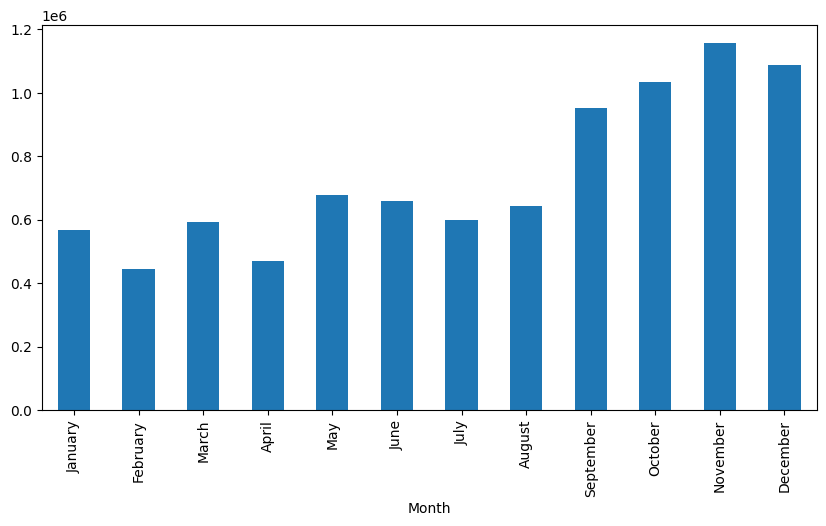

In [50]:
# Lets plot for average transaction per month
average_transaction_per_month.plot(kind = "bar", figsize=(10,5))

This chart shows that sales increases gradually through the year.

**3. average transaction value per year**

In [51]:
# Lets check for average transaction value per year

average_transaction_per_year = df.groupby('Year')['TotalPrice'].sum().reindex([2010, 2011])

average_transaction_per_year

Year
2010     570422.730
2011    8316786.164
Name: TotalPrice, dtype: float64

<Axes: xlabel='Year'>

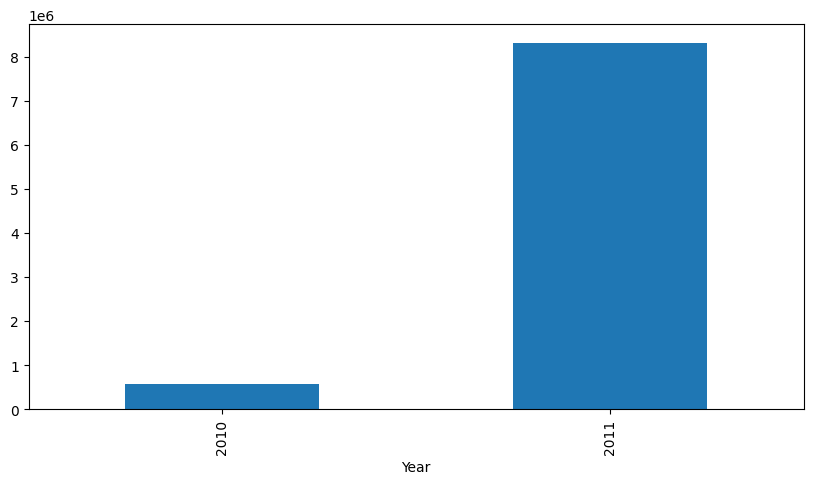

In [52]:
# Lets plot for average transaction per year
average_transaction_per_year.plot(kind = "bar", figsize = (10,5))

There are more sales in 2011 compared to 2010

**4. Work on product quantity**

In [53]:
print(df['Quantity'].describe())

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


In [54]:

print(f"\nNegative quantities: {(df['Quantity'] < 0).sum()} (these are returns)")
print(f"\nZero quantities: {(df['Quantity'] == 0).sum()} (these are cancellations)")
print(f"\nPositive quantities: {(df['Quantity'] > 0).sum()}")


Negative quantities: 0 (these are returns)

Zero quantities: 0 (these are cancellations)

Positive quantities: 392732


All the product quantities are positive, meaning that there no return or cancelled purchases.

**5. Work on Unit Price**

In [55]:
print(df['UnitPrice'].describe())

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


In [56]:
print(f"\nZero prices: {(df['UnitPrice'] == 0).sum()}")
print(f"Negative prices: {(df['UnitPrice'] < 0).sum()}")
print(f"Positive prices: {(df['UnitPrice'] > 0).sum()}")


Zero prices: 40
Negative prices: 0
Positive prices: 392692


**6. Countries and transactions**

In [57]:
print(f"\nTop 10 countries by number of transactions")

top_10_countries = df['Country'].value_counts().head(10)

top_10_countries


Top 10 countries by number of transactions


Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: count, dtype: int64

In [58]:
# Lets check the top 10 countries by percentage(%)
print(f"\nTop 10 countries by number of transactions")

top_10_countries_by_percentage= round(df["Country"].value_counts()/len(df)*100,2).head(10)

#top_10_countries_percentage = df["Country"].value_counts(normalize = True).head(10)
top_10_countries_by_percentage


Top 10 countries by number of transactions


Country
United Kingdom    88.92
Germany            2.30
France             2.12
EIRE               1.84
Spain              0.63
Netherlands        0.60
Belgium            0.52
Switzerland        0.47
Portugal           0.37
Australia          0.30
Name: count, dtype: float64

<Axes: xlabel='Country'>

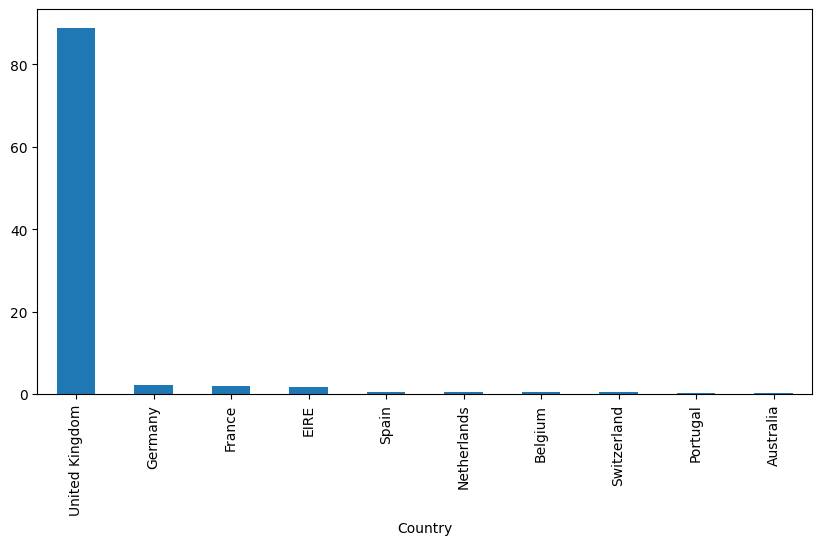

In [59]:
# lets plot for top 10 countries by number of transactions
top_10_countries_by_percentage.plot(kind = "bar", figsize = (10,5))

In [60]:
print(f"\nBottom 10 countries by number of transactions")


bottom_10_countries_by_percentage= round(df["Country"].value_counts()/len(df)*100,2).tail(10)

#bottom_10_countries = df['Country'].value_counts(normalize=True).tail(10)

bottom_10_countries_by_percentage


Bottom 10 countries by number of transactions


Country
Malta                   0.03
United Arab Emirates    0.02
European Community      0.02
RSA                     0.01
Lebanon                 0.01
Lithuania               0.01
Brazil                  0.01
Czech Republic          0.01
Bahrain                 0.00
Saudi Arabia            0.00
Name: count, dtype: float64

<Axes: xlabel='Country'>

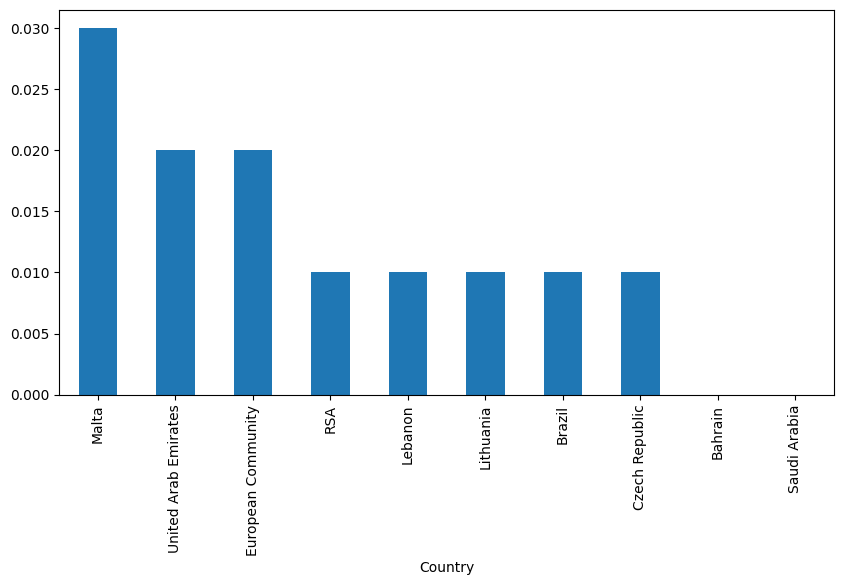

In [61]:
# plot for bottom 10 countries by number of transactions
bottom_10_countries_by_percentage.plot(kind = "bar", figsize = (10,5))

**United Kingdom Customers**

In [62]:
print(f"Total number of transactions from the UK: {df[df['Country'] == 'United Kingdom'].value_counts().sum()}")

Total number of transactions from the UK: 89976


Most of the customers are populated in United Kingdom, for form 89% of the customer base.

In [63]:
#LEts check the percentage of those transaction from UK
# print(df.Country.unique(),'\n', df.Country.nunique())

uk_customers = df[df['Country'] == 'United Kingdom']
uk_customers.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Day,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Monday,2010,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Monday,2010,December


**Total Revenue from United Kingdom**

In [64]:

print(f"Total sales in UK is £{uk_customers['TotalPrice'].sum()}")

Total sales in UK is £7285024.644


**Most product Sold in the UK**

In [65]:
print(f"Most popular product in UK is {uk_customers.StockCode.mode()[0]}")

# lets check product description of the most popular product
uk_customers[uk_customers['StockCode'] == '85123A']['Description'].unique()[0]

Most popular product in UK is 85123A


'WHITE HANGING HEART T-LIGHT HOLDER'

**How much have been made from this products**

In [66]:
print(f"Total sales for product 85123A is £{uk_customers[uk_customers['StockCode'] == '85123A']['TotalPrice'].sum()}")

Total sales for product 85123A is £94960.85


**Most Frequent customer**

In [67]:
print(f"Most popular or frequenting customer in uk is {uk_customers['CustomerID'].mode()[0]}")

Most popular or frequenting customer in uk is 17841.0


**How many times this customer has visited**

In [68]:
print(f"Number of transactions for customer ID 17841 is {uk_customers[uk_customers['CustomerID'] == 17841.0].value_counts().sum()}")

Number of transactions for customer ID 17841 is 1809


**How much has been made from this customer**

In [104]:
print(f"Total amount spent by customer ID 17841 is £{uk_customers[uk_customers['CustomerID'] == 17841.0]['TotalPrice'].sum()}")

Total amount spent by customer ID 17841 is £40519.840000000004


In [105]:
uk_customers[uk_customers['CustomerID'] == 17841.0]['TotalPrice'].sum()/uk_customers['TotalPrice'].sum()*100

np.float64(0.5562073154189319)

**Top 20 uk customers**

In [108]:
# Top 20 Uk customers by total amount spent
uk_customers.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(20)

CustomerID
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
16684.0     66653.56
14096.0     65164.79
13694.0     65039.62
15311.0     60632.75
13089.0     58762.08
17949.0     58510.48
15769.0     56252.72
15061.0     54534.14
14298.0     51527.30
14088.0     50491.81
15749.0     44534.30
12931.0     42055.96
17841.0     40519.84
15098.0     39916.50
Name: TotalPrice, dtype: float64

In [109]:
# Top 20 Uk customers by frequency
uk_customers.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(20)

CustomerID
12748.0    210
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
16029.0     63
13408.0     62
18102.0     60
13798.0     57
14527.0     55
16422.0     51
13694.0     50
15061.0     48
15039.0     47
16013.0     47
17450.0     46
17949.0     45
14298.0     44
15189.0     41
Name: InvoiceNo, dtype: int64

In [110]:
# Top 20 bulk buyers 
uk_customers.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(20)

CustomerID
16446.0    80997
12346.0    74215
17450.0    69973
17511.0    64549
18102.0    64124
13694.0    63312
14298.0    58343
16684.0    50255
16029.0    40108
15311.0    38147
16422.0    33704
16333.0    32184
13089.0    31025
17949.0    30546
15769.0    29672
15061.0    28920
12931.0    28004
17381.0    25649
12748.0    25288
13798.0    23948
Name: Quantity, dtype: int64

In [111]:
# Top 20 most recent customers
uk_customers.groupby('CustomerID')['InvoiceDate'].max().sort_values( ascending = False).head(20)
#uk_customers.sort_values('InvoiceDate', ascending = False).tail(20)

CustomerID
13113.0   2011-12-09 12:49:00
15804.0   2011-12-09 12:31:00
13777.0   2011-12-09 12:25:00
17581.0   2011-12-09 12:21:00
12748.0   2011-12-09 12:20:00
16705.0   2011-12-09 12:08:00
15311.0   2011-12-09 12:00:00
16626.0   2011-12-09 11:56:00
18102.0   2011-12-09 11:50:00
14446.0   2011-12-09 11:34:00
14422.0   2011-12-09 11:26:00
17754.0   2011-12-09 11:20:00
15910.0   2011-12-09 10:51:00
12985.0   2011-12-09 10:46:00
15344.0   2011-12-09 10:45:00
14051.0   2011-12-09 10:20:00
16558.0   2011-12-09 10:20:00
16954.0   2011-12-09 09:46:00
17428.0   2011-12-09 09:45:00
15694.0   2011-12-09 09:44:00
Name: InvoiceDate, dtype: datetime64[ns]

In [70]:
# Extract month from datetime
df['Month'] = df['InvoiceDate'].dt.month
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Day,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Monday,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Monday,2010,12


In [71]:
#####

df.Month.value_counts()
df['InvoiceDate'].dt.to_period('M').value_counts()

InvoiceDate
2011-11    63182
2011-10    48796
2011-09    39671
2011-05    28075
2011-06    26926
2011-03    26872
2011-08    26796
2011-07    26582
2010-12    25673
2011-04    22435
2011-01    20991
2011-02    19707
2011-12    17026
Freq: M, Name: count, dtype: int64

In [72]:
print("""
RECENCY (Days since last purchase):
  - Min: {:.0f} days (bought very recently - GREAT)
  - Max: {:.0f} days (haven't bought in {} days - AT RISK)
  - Avg: {:.1f} days

FREQUENCY (Number of purchases):
  - Min: {:.0f} purchases (new/one-time customer)
  - Max: {:.0f} purchases (super loyal customer)
  - Avg: {:.1f} purchases

MONETARY (Total spending):
  - Min: £{:.2f}
  - Max: £{:.2f} (VIP customer!)
  - Avg: £{:.2f}
""".format(
    rfm['Recency'].min(),
    rfm['Recency'].max(), rfm['Recency'].max(),
    rfm['Recency'].mean(),
    rfm['Frequency'].min(),
    rfm['Frequency'].max(),
    rfm['Frequency'].mean(),
    rfm['Monetary'].min(),
    rfm['Monetary'].max(),
    rfm['Monetary'].mean()
))


RECENCY (Days since last purchase):
  - Min: 1 days (bought very recently - GREAT)
  - Max: 374 days (haven't bought in 374 days - AT RISK)
  - Avg: 92.5 days

FREQUENCY (Number of purchases):
  - Min: 1 purchases (new/one-time customer)
  - Max: 210 purchases (super loyal customer)
  - Avg: 4.3 purchases

MONETARY (Total spending):
  - Min: £0.00
  - Max: £280206.02 (VIP customer!)
  - Avg: £2048.22



In [73]:
print("\nTop 5 by RECENCY (Most recent buyers):")
print(rfm.nsmallest(5, 'Recency'))

print("\nTop 5 by FREQUENCY (Most loyal customers):")
print(rfm.nlargest(5, 'Frequency'))

print("\nTop 5 by MONETARY (Highest spenders):")
print(rfm.nlargest(5, 'Monetary'))


Top 5 by RECENCY (Most recent buyers):
     CustomerID  Recency  Frequency  Monetary
61      12423.0        1          8   1859.31
71      12433.0        1          7  13375.87
137     12518.0        1          5   2056.89
144     12526.0        1          3   1316.66
258     12662.0        1         11   3849.78

Top 5 by FREQUENCY (Most loyal customers):
      CustomerID  Recency  Frequency   Monetary
326      12748.0        1        210   33053.19
1880     14911.0        1        201  143711.17
4011     17841.0        2        124   40519.84
562      13089.0        3         97   58762.08
1662     14606.0        1         93   12076.15

Top 5 by MONETARY (Highest spenders):
      CustomerID  Recency  Frequency   Monetary
1690     14646.0        2         74  280206.02
4202     18102.0        1         60  259657.30
3729     17450.0        8         46  194390.79
3009     16446.0        1          2  168472.50
1880     14911.0        1        201  143711.17


In [74]:
# VIP Customers (Recent + Frequent + High Spender)
print("\nVIP Customers (Recency < 30, Frequency > 10, Monetary > 5000):")
vip = rfm[(rfm['Recency'] < 30) & 
          (rfm['Frequency'] > 10) & 
          (rfm['Monetary'] > 5000)]
print(f"Found {len(vip)} VIP customers")
print(vip.head())


VIP Customers (Recency < 30, Frequency > 10, Monetary > 5000):
Found 175 VIP customers
     CustomerID  Recency  Frequency   Monetary
55      12415.0       24         21  124914.53
100     12471.0        2         30   19788.65
103     12474.0       17         18    7324.09
105     12476.0       16         11    6816.42
155     12540.0       20         17   13400.24


In [75]:
# At-Risk Customers (Used to spend a lot but haven't bought recently)
print("\nAt-Risk Customers (Recency > 180, Monetary > 5000):")
at_risk = rfm[(rfm['Recency'] > 180) & (rfm['Monetary'] > 5000)]
print(f"Found {len(at_risk)} at-risk customers")
print(at_risk.head())


At-Risk Customers (Recency > 180, Monetary > 5000):
Found 6 at-risk customers
      CustomerID  Recency  Frequency  Monetary
0        12346.0      326          1  77183.60
196      12590.0      211          2   9864.26
566      13093.0      276          8   7832.47
2012     15098.0      182          3  39916.50
2503     15749.0      235          3  44534.30


In [76]:
#New Customers (Low frequency but recent)
print("\nNew Customers (Frequency = 1, Recency < 30):")
new_customers = rfm[(rfm['Frequency'] == 1) & (rfm['Recency'] < 30)]
print(f"Found {len(new_customers)} new customers")
print(new_customers.head())


New Customers (Frequency = 1, Recency < 30):
Found 204 new customers
    CustomerID  Recency  Frequency  Monetary
3      12349.0       19          1   1757.55
19     12367.0        4          1    168.90
24     12374.0       25          1    742.93
36     12391.0       22          1    439.66
78     12442.0        3          1    172.06


###  **6. Clustering Algorithms & Interpretation**

##### **Method 1 -Clustering Without Elbow**

In [77]:
# Lets build the cluster using k-means

# Here we would intuitively choose numbers of clusters as 3

kmeans = KMeans(n_clusters=3, random_state=234)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,0
1,12347.0,2,7,4310.00,1
2,12348.0,75,4,1797.24,1
3,12349.0,19,1,1757.55,1
4,12350.0,310,1,334.40,0
5,12352.0,36,8,2506.04,1
6,12353.0,204,1,89.00,0
7,12354.0,232,1,1079.40,0
8,12355.0,214,1,459.40,0
9,12356.0,23,3,2811.43,1


In [78]:
# To understand what each cluster  means, lets take the mean of the Recency, Frequency and Monetary

cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,246.2,1.6,629.3
1,41.0,4.9,2004.4
2,7.1,80.4,122748.8


Cluster 0 – Inactive / low-value customers (old purchases, rare buying)

Cluster 1 – Recent moderate customers

Cluster 2 – High-value loyal customers

##### **Method 2 -Clustering Using Rule Based Approach**

**now let’s turn our RFM numbers into clear labels using a rule-based approach using thresholds and quantiles.**

**1. Threshold-based rules**

We can define loyalty explicitly. Example:

- Recency ≤ 30 days  (bought recently)

- Frequency ≥ 10  (buys often)

- Monetary ≥ 500 (spends a lot)

In [79]:
rfm_new = rfm.copy()

In [80]:
def label_loyalty(row):
    if (row["Recency"] <=30) and (row["Frequency"] >= 10) and (row["Monetary"] >= 500):
        return "loyal"
    else:
        return "Not loyal"
    
# lets apply the function to dataframe
rfm_new["Loyalty"] = rfm_new.apply(label_loyalty, axis =1)

In [81]:
rfm_new.head(2)

,CustomerID,Recency,Frequency,Monetary,Cluster,Loyalty
0,12346.0,326,1,77183.6,0,Not loyal
1,12347.0,2,7,4310.0,1,Not loyal


**2. Quantile-based rules (data-driven)**

Instead of hard thresholds, use percentiles

- Top 25% in Frequency and Monetary

- Bottom 25% in Recency (recent purchases are better)

In [82]:
rfm_quant = rfm.copy()

In [83]:
quantiles = rfm_quant.quantile(q=[0.25, 0.75])
q_recency = quantiles["Recency"]
q_frequency = quantiles["Frequency"]
q_monetary = quantiles["Monetary"]

In [84]:
q_recency

0.25     18.0
0.75    142.0
Name: Recency, dtype: float64

In [85]:
# LEts now define loyalty based on quantiles
def label_loyal_quant(row):
    if (row["Recency"] <= q_recency[0.25]) and \
        (row["Frequency"] >= q_frequency[0.75]) and\
        (row["Monetary"] >= q_monetary[0.75]):
        return "Loyal"
    else:
        return "Not Loyal"
    
# lets apply the function
rfm_quant["Loyalty"] = rfm_quant.apply(label_loyal_quant,axis =1)

In [86]:
rfm_quant.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Loyalty
0,12346.0,326,1,77183.60,0,Not Loyal
1,12347.0,2,7,4310.00,1,Loyal
2,12348.0,75,4,1797.24,1,Not Loyal
3,12349.0,19,1,1757.55,1,Not Loyal
4,12350.0,310,1,334.40,0,Not Loyal


##### **Method 3 -Clustering Using Elbow Method**

How it works:
1. Try different numbers of clusters (k = 1 to 10)
2. Calculate "inertia" (sum of squared distances to nearest cluster center)
3. Plot the results
4. Look for the "elbow" - where adding more clusters doesn't help much

Think of it like, "at what point are we over-segmenting?"

In [87]:
# lets find the optimal number of clusters
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state = 234)
    kmeans.fit(rfm[["Recency", "Frequency", "Monetary"]])
    inertia.append(kmeans.inertia_)
    print(f"k = {k}: Inertia = {kmeans.inertia_:.2f}")

k = 1: Inertia = 350192770636.05
k = 2: Inertia = 117868026096.02
k = 3: Inertia = 57112592882.48
k = 4: Inertia = 37047382172.85
k = 5: Inertia = 21076282426.53
k = 6: Inertia = 14081019736.27
k = 7: Inertia = 10289032566.90
k = 8: Inertia = 6940562437.77
k = 9: Inertia = 5581062629.22
k = 10: Inertia = 4077463889.51


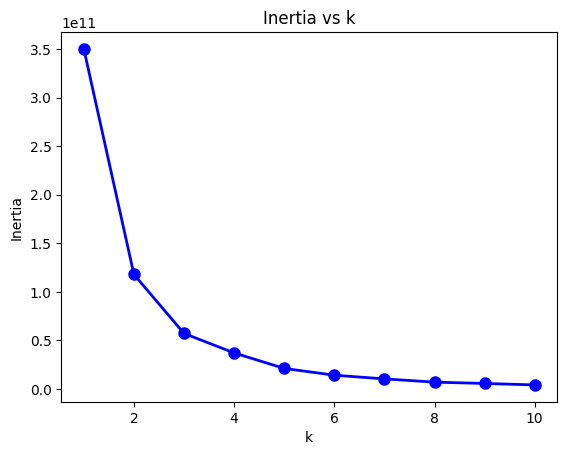

In [88]:
# plot inertia vs k
plt.plot(k_range, inertia, 'bo-', linewidth = 2,marker = 'o', markersize = 8)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Inertia vs k")
plt.show()

The elbow point here is between 4 and 6, where adding more clusters(k) does not reduce the inertia much.

In [89]:
# Lets fit k-mean and create cluster labels

# SUppose we choose k =4

kmeans = KMeans(n_clusters = 4, random_state = 234)
rfm["Cluster"] = kmeans.fit_predict(rfm)


# lets look at the cluster counts

rfm["Cluster"].value_counts()

Cluster
3    2276
0    2028
2      30
1       5
Name: count, dtype: int64

In [90]:
rfm.Cluster.unique()

array([2, 0, 3, 1], dtype=int32)

In [91]:
# Interpreting Clusters
# lets compute average RFM values per cluster

rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,83.534024,4.898422,2099.775154
1,2.600000,76.600000,209287.556000
2,32.266667,44.166667,53310.462333
3,101.515378,3.028998,871.315128


**WIth Annotated Elbow**

In [92]:
# Lets create the feaure matrix(x)


X = rfm[["Recency","Frequency","Monetary"]].values

# lets standardize using standard scaler to get it done 


# intialize scaler
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

# Show the transformation

rfm_scaled = pd.DataFrame(X_scaled, columns = ["Recency_scaled","Frequency_scaled","Monetary_scaled"])
rfm_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.334858,-0.424675,8.363977
1,-0.905199,0.354080,0.251779
2,-0.175186,-0.035297,-0.027938
3,-0.735196,-0.424675,-0.032357
4,2.174855,-0.424675,-0.190780


In [93]:
# Lets calculate inertia for different k-values

inertias = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans( n_clusters = k, random_state = 234, n_init = 10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"k = {k}: Inertia = {kmeans.inertia_:.2f}")

k = 1: Inertia = 13017.00
k = 2: Inertia = 9016.15
k = 3: Inertia = 5442.38
k = 4: Inertia = 4097.64
k = 5: Inertia = 3122.11
k = 6: Inertia = 2473.55
k = 7: Inertia = 2023.37
k = 8: Inertia = 1716.20
k = 9: Inertia = 1443.95
k = 10: Inertia = 1281.76


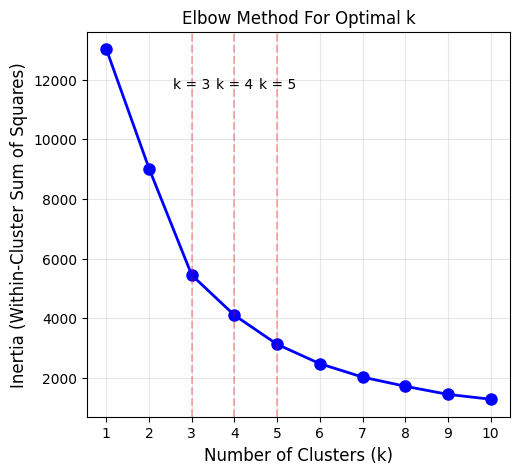

In [94]:
  # Plot Elbow Curve

plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, 'bo-', linewidth = 2, markersize = 8)
plt.xlabel("Number of Clusters (k)",fontsize =12)
plt.ylabel("Inertia (Within-Cluster Sum of Squares)", fontsize =12)
plt.title("Elbow Method For Optimal k", fontsize = 12)
plt.xticks(k_range)
plt.grid(True, alpha = 0.3)


# Lets add this to highlight potential elbows

for k in [3,4,5]:
    plt.axvline(x =k, color ="red", linestyle = "--",alpha =0.3)
    plt.text(k, max(inertias)*0.9, f"k = {k}", ha = "center")

In [95]:
# inverse transform the scaled RFM values to make interpreting the values quite easy

rfm[["Recency","Frequency","Monetary"]] = scaler.inverse_transform(rfm_scaled[["Recency_scaled","Frequency_scaled","Monetary_scaled"]])

In [96]:
rfm.head(2)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326.0,1.0,77183.6,2
1,12347.0,2.0,7.0,4310.0,0


To understand what each cluster means, compute the average R, F, M per cluster

In [97]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_summary)


         Recency  Frequency  Monetary
Cluster                              
0           83.5        4.9    2099.8
1            2.6       76.6  209287.6
2           32.3       44.2   53310.5
3          101.5        3.0     871.3


**Insights From the Clusters**

| Cluster | Recency      | Frequency | Monetary      | Interpretation                                                                                            |
| :------ | :----------- | :-------- | :------------ | :-------------------------------------------------------------------------------------------------------- |
| **1**   | **2.6 days** | **76.6**  | **209,287.6** |  **Best customers** – they bought very recently, buy often, and spend a lot.                            |
| **2**   | 32.3 days    | 44.2      | 53,310.5      |  **Loyal mid-tier** – active customers, buy regularly, good spenders, but not as top-tier as Cluster 1. |
| **0**   | 83.5 days    | 4.9       | 2,099.8       |  **At-risk or dormant** – haven’t purchased in a while, buy infrequently, and spend little.             |
| **3**   | 101.5 days   | 3.0       | 871.3         |  **Lost customers** – longest since last purchase, lowest spending and purchase count.                  |


**Putting the insights to use**


Cluster 1 (Best Customers): Give VIP perks or early access to new products.

Cluster 2 (Loyal Mid-tier): Encourage them to spend more — maybe through loyalty points or volume discounts.

Cluster 0 (At Risk): Send “We miss you” emails or targeted reactivation offers.

Cluster 3 (Lost): Analyze what caused churn (price, shipping, product availability, complaints etc). Check through customer complaint data and filter for these customers

In [98]:
%%capture
%pip install nbformat
%pip show nbformat

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.io as px
px.renderers.default = 'vscode'

import nbformat


# Reduce RFM (scaled) to 2 components
pca = PCA(2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Convert to DataFrame for easier plotting
rfm_pca = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])
rfm_pca['Cluster'] = rfm['Cluster']

In [100]:
import plotly.express as px
import plotly.io as pio

# Set renderer for VS Code (use 'browser' if you prefer an external tab)
pio.renderers.default = 'vscode'
# pio.renderers.default = 'browser'

# the plot
fig = px.scatter(
    rfm_viz,
    x='PCA1',
    y='PCA2',
    color='Segment',
    hover_data=['CustomerID', 'Recency', 'Frequency', 'Monetary'],
    title='Customer Segments based on RFM (Interactive PCA Visualization)',
    color_discrete_map={
        'Best Customers': 'green',
        'Loyal Mid-tier': 'blue',
        'At Risk': 'orange',
        'Lost Customers': 'red'
    }
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


NameError: name 'rfm_viz' is not defined

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples


labels = kmeans.labels_
sil_score = silhouette_score(rfm_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.479


Scores between 0.4 and 0.6 suggest reasonably distinct clusters, though not perfectly separated.

There might have been some overlap between clusters, but overall K-Means did a fair job grouping your data.

For n_clusters = 2, the average silhouette score is 0.561


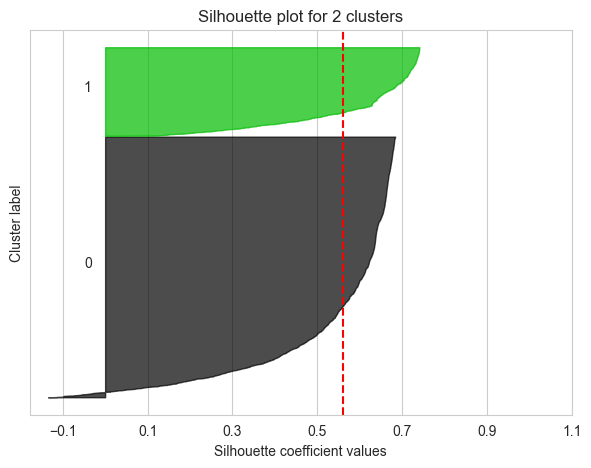

For n_clusters = 3, the average silhouette score is 0.594


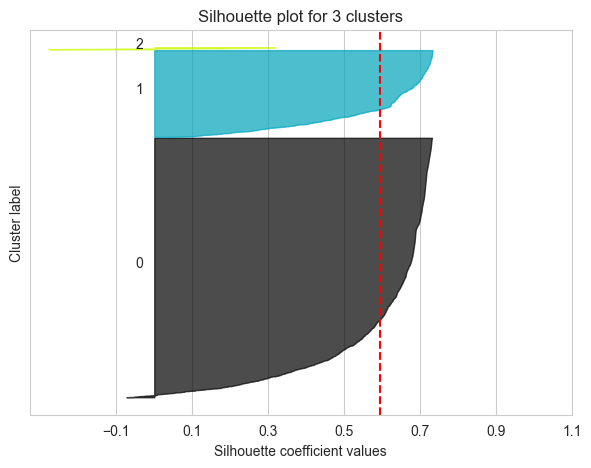

For n_clusters = 4, the average silhouette score is 0.616


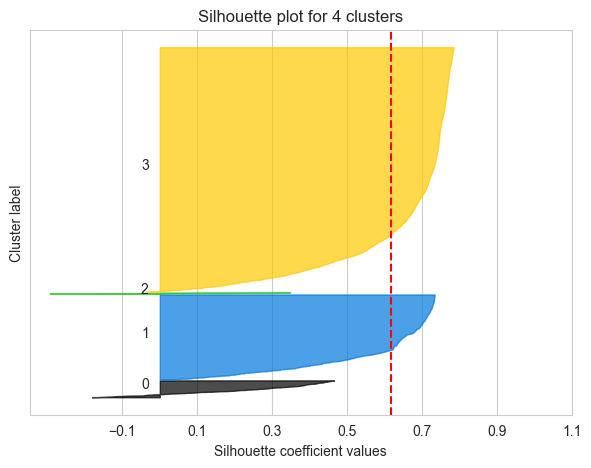

For n_clusters = 5, the average silhouette score is 0.436


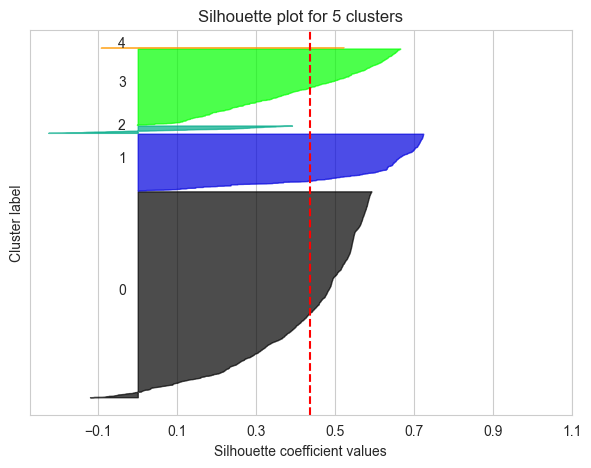

For n_clusters = 6, the average silhouette score is 0.483


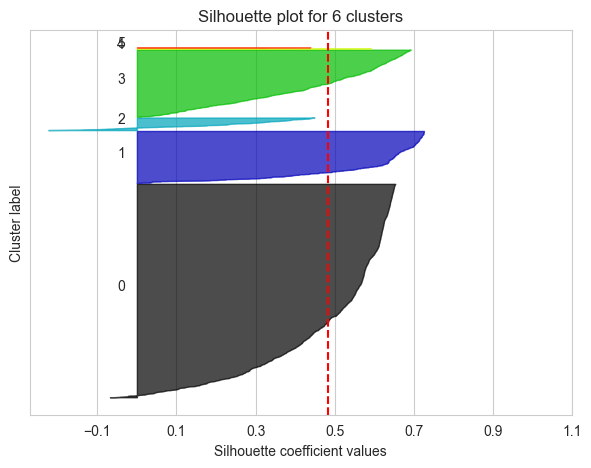

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # Initialize KMeans
    from sklearn.cluster import KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    plt.show()


k = 4 gives the highest silhouette score (0.616) — meaning that’s likely the best balance between cluster cohesion and separation.

##### **Method 4-DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

- DBSCAN groups together points that are close to each other based on a density measure, and marks points in low-density regions as outliers (noise).

Unlike K-Means, we don’t specify k (number of clusters).It can find clusters of arbitrary shape. It doesn’t perform well when clusters have very different densities.

**Key parameters**

`eps` (epsilon) — maximum distance between two samples for them to be considered in the same neighborhood. Think of it as how “close” points must be to belong to a cluster.

`min_samples` — the minimum number of points needed to form a dense region (a cluster). Think of it as how “thick” a region must be before it’s a cluster

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [2.0, 3.0]:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(rfm_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} → clusters={n_clusters}")
    


eps=2.0 → clusters=4
eps=3.0 → clusters=4


In [ ]:
# Evaluate if there are clusters
if n_clusters > 1:
    print("Silhouette Score:", silhouette_score(rfm_scaled, dbscan_labels))
else:
    print("Silhouette score cannot be computed (only one cluster found).")


Silhouette Score: 0.8993383579848409


Clusters are extremely tight, customers in the same group are highly similar in RFM behavior.

Cluster boundaries are very clear, points rarely fall between clusters (low overlap).

DBSCAN has perfectly captured natural density regions in your scaled space.

This likely means our RFM features have strong, distinct behavioral patterns (e.g., groups of high-value customers, frequent buyers, or occasional visitors).

In [ ]:
rfm['Cluster'] = labels
rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
-1,82.777778,77.111111,100538.545556
0,92.664200,4.010407,1688.214101
1,2.500000,89.500000,11633.030000
2,2.000000,94.000000,59697.415000
3,1.500000,67.000000,269931.660000


| Cluster | Recency ↓ (lower = recent) | Frequency ↑ | Monetary ↑ | Interpretation                                                                                                                                                                                       |
| ------- | -------------------------- | ----------- | ---------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **-1**  | 82.8                       | 77.1        | 100,538    | These are **noise points** (label = -1), meaning DBSCAN couldn’t confidently place them in any cluster. Still, they look like **mid-value, moderately active customers** — not extreme in any sense. |
| **0**   | 92.7                       | 4.0         | 1,688      | **Dormant / one-time customers.** Haven’t bought in a long time, rarely shop, and spend little.                                                                                                      |
| **1**   | 2.5                        | 89.5        | 11,633     | **Frequent but low-value buyers.** Recent activity, high purchase count, but relatively modest total spending.                                                                                       |
| **2**   | 2.0                        | 94.0        | 59,697     | **High-value loyal customers.** Buy often and recently, spend a lot — your core segment!                                                                                                             |
| **3**   | 1.5                        | 67.0        | 269,932    | **VIP / top spenders.** Extremely recent, fairly frequent, and huge spenders — likely corporate or wholesale customers.                                                                              |


##### **Method 5-Agglomerative (Hierarchical) Clustering**

Hierarchical Clustering works quite differently from K-Means or DBSCAN, instead of “guessing” clusters, it builds them step by step, merging the two most similar points or clusters until everything joins into one big tree — **a dendrogram**.

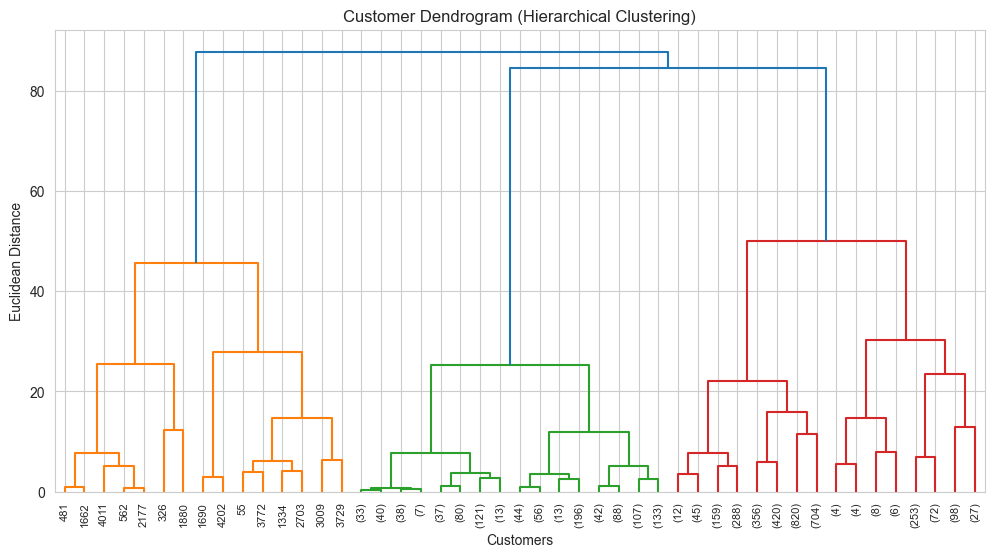

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create the linkage matrix (Ward’s method minimizes variance within clusters)
linked = linkage(rfm_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Customer Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
rfm['Cluster'] = agg.fit_predict(rfm_scaled)

rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,42.673687,4.801282,2054.093762
1,6.733333,83.600000,111780.635333
2,249.558206,1.481870,459.244467


In [ ]:
# inverse transform the scaled RFM values to make interpreting the values quite easy

rfm[["Recency","Frequency","Monetary"]] = scaler.inverse_transform(rfm_scaled[["Recency_scaled","Frequency_scaled","Monetary_scaled"]])


rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,42.7,4.8,2054.1
1,6.7,83.6,111780.6
2,249.6,1.5,459.2


| Cluster | Recency | Frequency | Monetary  | Interpretation                                                                                        |
| ------- | ------- | --------- | --------- | ----------------------------------------------------------------------------------------------------- |
| **0**   | 42.7    | 4.8       | 2,054.1   | Customers purchase occasionally, not too recent — mid-value customers.                                |
| **1**   | 6.7     | 83.6      | 111,780.6 | Very recent, very frequent, and spend a lot — your **best customers**.                                |
| **2**   | 249.6   | 1.5       | 459.2     | Haven’t purchased in a long time, buy rarely, and spend little — your **lost or inactive** customers. |


In [ ]:
rfm_summary = pd.DataFrame(rfm)
rfm_summary

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326.0,1.0,77183.60,0
1,12347.0,2.0,7.0,4310.00,0
2,12348.0,75.0,4.0,1797.24,0
3,12349.0,19.0,1.0,1757.55,0
4,12350.0,310.0,1.0,334.40,2
...,...,...,...,...,...
4334,18280.0,278.0,1.0,180.60,2
4335,18281.0,181.0,1.0,80.82,2
4336,18282.0,8.0,2.0,178.05,0
4337,18283.0,4.0,16.0,2045.53,0


In [ ]:
colors = {0: 'orange', 1: 'green', 2: 'red'}
rfm_summary['Color'] = rfm_summary['Cluster'].map(colors)
rfm_summary

,CustomerID,Recency,Frequency,Monetary,Cluster,Color
0,12346.0,326.0,1.0,77183.60,0,orange
1,12347.0,2.0,7.0,4310.00,0,orange
2,12348.0,75.0,4.0,1797.24,0,orange
3,12349.0,19.0,1.0,1757.55,0,orange
4,12350.0,310.0,1.0,334.40,2,red
...,...,...,...,...,...,...
4334,18280.0,278.0,1.0,180.60,2,red
4335,18281.0,181.0,1.0,80.82,2,red
4336,18282.0,8.0,2.0,178.05,0,orange
4337,18283.0,4.0,16.0,2045.53,0,orange


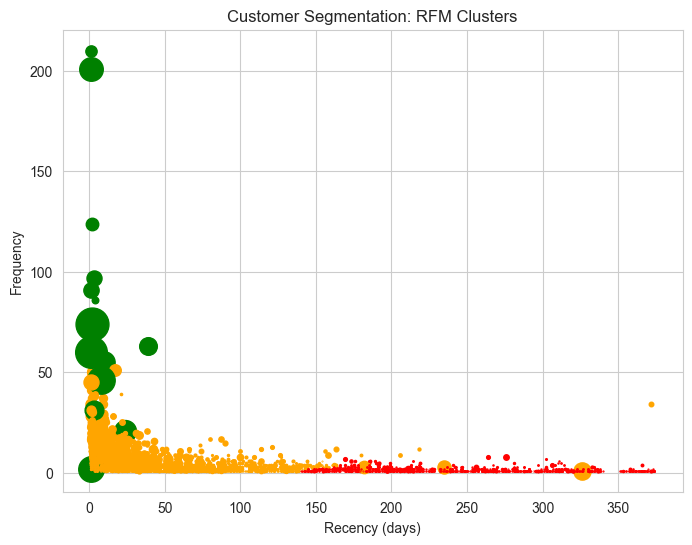

In [ ]:
plt.figure(figsize=(8,6))
for _, row in rfm_summary.iterrows():
    plt.scatter(row['Recency'], row['Frequency'], 
                color=row['Color'], s=row['Monetary']/500,  # bubble size scaled by money
                label=f"Cluster {int(row['Cluster'])}")

plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Customer Segmentation: RFM Clusters')
#plt.legend(title='Clusters')
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

colors = {
    0: 'orange',
    1: 'green',
    2: 'red'
}
rfm_summary['Color'] = rfm_summary['Cluster'].map(colors)

# --- Plotly interactive scatter plot ---
fig = px.scatter(
    rfm_summary,
    x='Recency',
    y='Frequency',
    size='Monetary',
    color='Segment',
    color_discrete_map=colors,
    hover_data=['Monetary', 'Recency', 'Frequency'],
    title='Interactive RFM Customer Segmentation',
)

# --- Styling tweaks ---
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Recency (days since last purchase)',
    yaxis_title='Frequency (number of purchases)',
    title_font=dict(size=18),
    legend_title='Customer Segments',
    template='plotly_white'
)

fig.show()


### **7. Profiling and labeling clusters**

In [ ]:
cluster_labels = {
    0: "Regular Buyers",
    1: "Champions / Loyal VIPs",
    2: "Lost / Inactive Customers"
}

rfm['Customer_Segment'] = rfm['Cluster'].map(cluster_labels)


In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Customer_Segment
0,12346.0,326.0,1.0,77183.60,0,Regular Buyers
1,12347.0,2.0,7.0,4310.00,0,Regular Buyers
2,12348.0,75.0,4.0,1797.24,0,Regular Buyers
3,12349.0,19.0,1.0,1757.55,0,Regular Buyers
4,12350.0,310.0,1.0,334.40,2,Lost / Inactive Customers


Quantify Business Impact

We’ll calculate:
- Each segment’s share of customers, and
- Each segment’s share of total revenue.

In [ ]:
# 1. Proportion of customers in each cluster
customer_share = (
    rfm['Customer_Segment']
    .value_counts(normalize=True)
    .rename_axis('Customer_Segment')
    .reset_index(name='Customer_Share')
)

customer_share

,Customer_Segment,Customer_Share
0,Regular Buyers,0.755013
1,Lost / Inactive Customers,0.241530
2,Champions / Loyal VIPs,0.003457


| **Customer Segment**          | **Customer Share (%)** | **Insight**                                                                                                                                                                              |
| ----------------------------- | ---------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Regular Buyers**            | **75.5%**              | The majority of your customer base. They buy occasionally and sustain steady sales volume. Focus on increasing purchase frequency through product recommendations or loyalty incentives. |
| **Lost / Inactive Customers** | **24.2%**              | A sizable portion that has disengaged. These are potential targets for reactivation or re-engagement campaigns.                                                                          |
| **Champions / Loyal VIPs**    | **0.3%**               | A very small but highly loyal group. Though few in number, they’re critical for long-term value — keep them satisfied with personalized experiences and early access to offers.          |


In [ ]:
# 2. Share of total revenue (Monetary)
revenue_share = (
    rfm.groupby('Customer_Segment')['Monetary']
    .sum()
    .reset_index(name='Total_Revenue')
)
revenue_share

,Customer_Segment,Total_Revenue
0,Champions / Loyal VIPs,1676709.530
1,Lost / Inactive Customers,481288.201
2,Regular Buyers,6729211.163


In [ ]:

# 3. Merge both
segment_summary = customer_share.merge(revenue_share, on='Customer_Segment')
segment_summary['Revenue_Share (%)'] = (
    segment_summary['Total_Revenue'] / segment_summary['Total_Revenue'].sum()
) * 100

segment_summary

,Customer_Segment,Customer_Share,Total_Revenue,Revenue_Share (%)
0,Regular Buyers,0.755013,6729211.163,75.717936
1,Lost / Inactive Customers,0.241530,481288.201,5.415516
2,Champions / Loyal VIPs,0.003457,1676709.530,18.866548


| **Customer Segment**          | **Total Revenue** | **Revenue Share (%)** | **Insight**                                                                                                    |
| ----------------------------- | ----------------- | --------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Regular Buyers**            | 6,729,211         | 75.7%                 | Largest contributor to total revenue; stable base. Focus on retention and gentle upselling.                    |
| **Champions / Loyal VIPs**    | 1,676,709         | 18.9%                 | Small group with high value. Keep engaged with loyalty programs, personalized offers, and premium experiences. |
| **Lost / Inactive Customers** | 481,288           | 5.4%                  | Low contribution to revenue; target for reactivation campaigns or special incentives.                          |


interpreting

| Segment                    | What It Means                                             | What To Do                                                                        |
| -------------------------- | --------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Champions / Loyal VIPs** | Less than 1% of customers generate nearly 19% of revenue. | Personalize retention campaigns: early access, premium services, loyalty rewards. |
| **Regular Buyers**         | Core base; bring stability and consistent sales.          | Encourage upselling: recommend products based on past behavior.                   |
| **Lost / Inactive**        | Weak engagement but potential growth area.                | Run reactivation or win-back campaigns (email, discounts).                        |


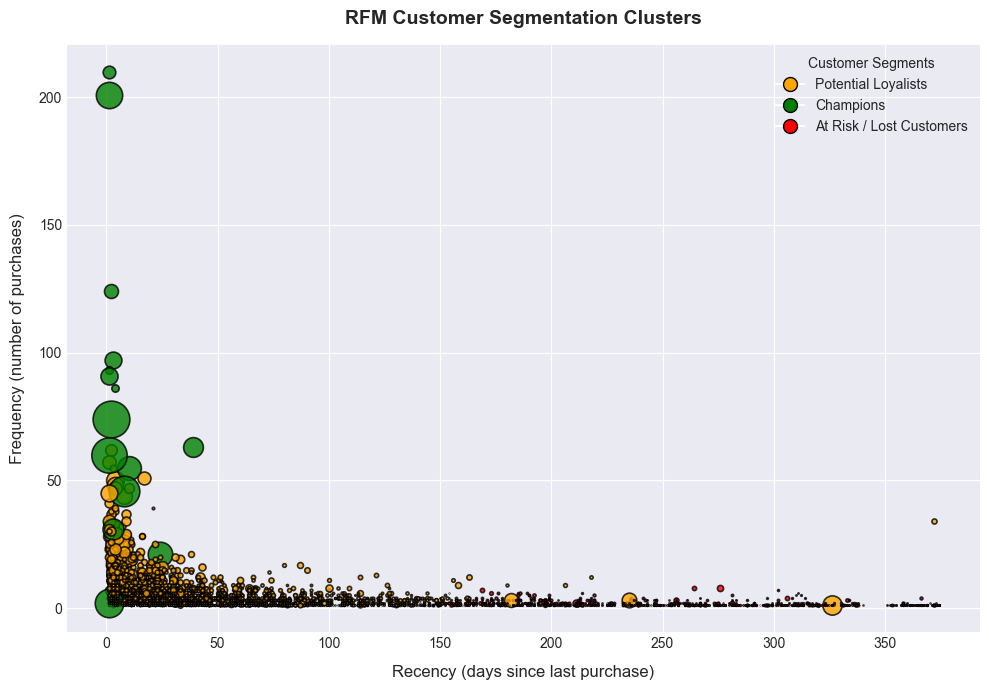

In [ ]:
# --- Step 2: Assign colors & labels ---
colors = {0: 'orange', 1: 'green', 2: 'red'}

rfm_summary['Color'] = rfm_summary['Cluster'].map(colors)


# --- Step 3: Plot setup ---
plt.figure(figsize=(10, 7))
plt.style.use('seaborn-v0_8-darkgrid')

# --- Step 4: Bubble plot ---
for _, row in rfm_summary.iterrows():
    plt.scatter(row['Recency'], row['Frequency'],
                s=row['Monetary']/400,  # scale bubbles by money
                color=row['Color'],
                alpha=0.8,
                edgecolor='black',
                linewidth=1.2)
  
# --- Step 5: Axis and title ---
plt.xlabel('Recency (days since last purchase)', fontsize=12, labelpad=10)
plt.ylabel('Frequency (number of purchases)', fontsize=12, labelpad=10)
plt.title('RFM Customer Segmentation Clusters', fontsize=14, weight='bold', pad=15)

# --- Step 6: Add legend manually ---
handles = [plt.Line2D([], [], marker='o', color='w', label=labels[c],
                      markerfacecolor=colors[c], markersize=10, markeredgecolor='black')
           for c in colors]
plt.legend(handles=handles, title='Customer Segments', loc='upper right', fontsize=10)

# --- Step 7: Show plot ---
plt.tight_layout()
plt.show()